# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

### Step 1

Load an image (any image that contains faces).

### Step 2

Load the dlib face predictor.

### Step 3

Run the predictor on your image.

### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

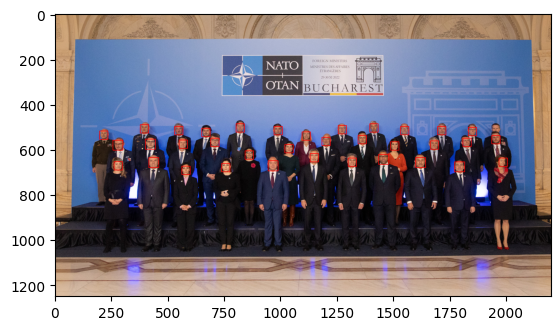

In [18]:
import dlib
import cv2
from matplotlib import pyplot as plt

# Load the pre-trained face detector model
detector = dlib.get_frontal_face_detector()

def face_detector_dlib(url):

    # Read the input image using OpenCV
    img = cv2.imread(url)

    # Convert the image to grayscale as Dlib works with grayscale images for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = detector(gray, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw rectangles around the faces
    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the output image with face detections
    plt.imshow(img)

face_detector_dlib('data/1.jpg')

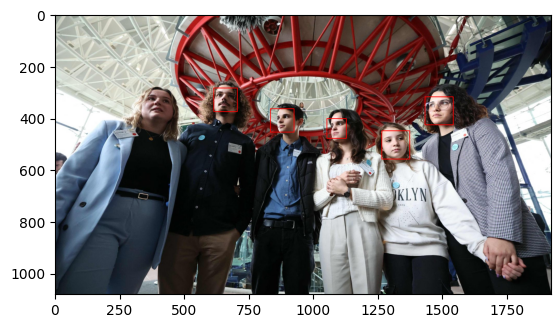

In [17]:
face_detector_dlib('data/2.jpeg')

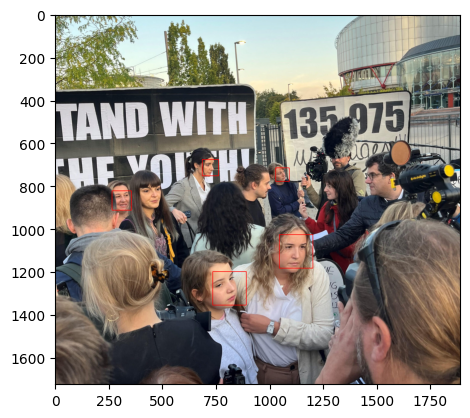

In [19]:
face_detector_dlib('data/3.jpg')

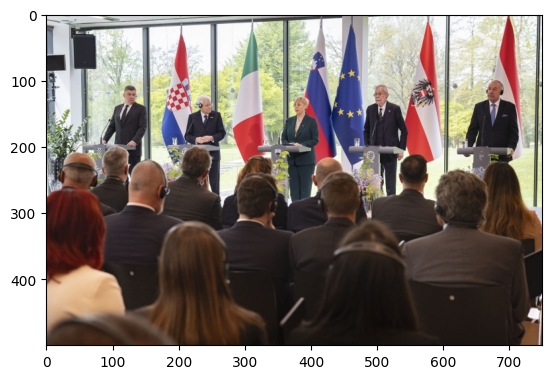

In [20]:
face_detector_dlib('data/4.jpeg')

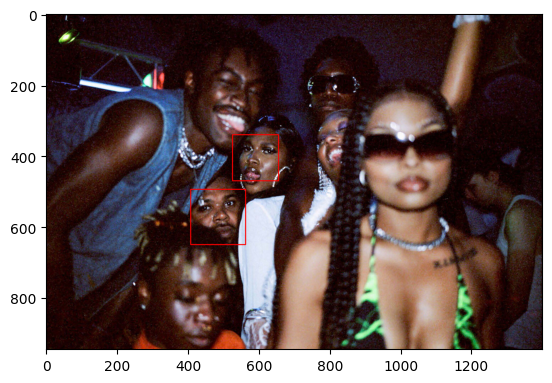

In [21]:
face_detector_dlib('data/8.jpg')

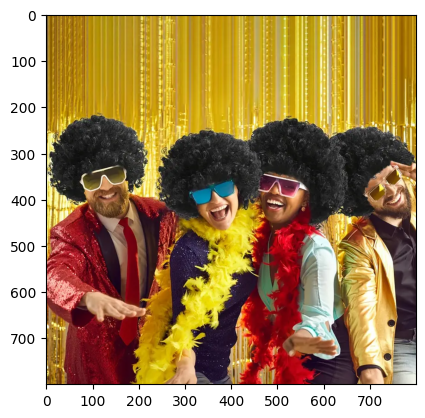

In [22]:
face_detector_dlib('data/8.webp')

Dlib works good most of the time. I think it fails with small faces that are not looking on camera. Also it has problems with faces with shadows. Failed on picture with big glasses

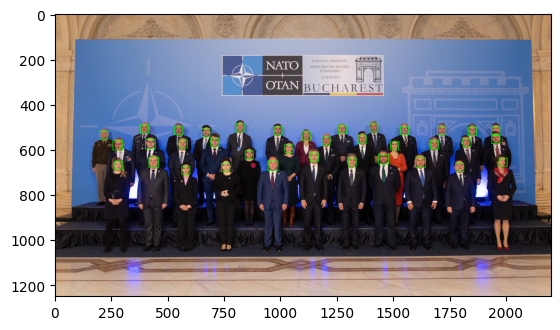

In [24]:
import face_recognition

detector = dlib.get_frontal_face_detector()

def face_detector_fr(url):

    # Read the input image using OpenCV
    img = face_recognition.load_image_file(url)
    faces = face_recognition.face_locations(img)

    # Draw rectangles around the faces
    for (top, right, bottom, left) in faces:
        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)

    # Display the output image with face detections
    plt.imshow(img)

face_detector_fr('data/1.jpg')

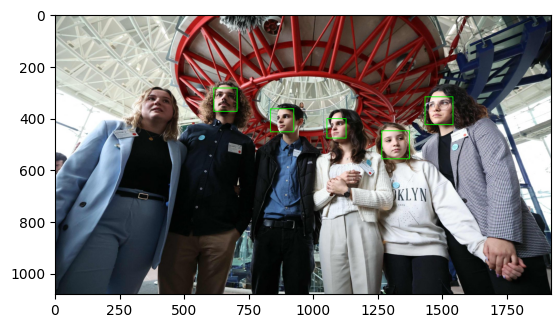

In [25]:
face_detector_fr('data/2.jpeg')

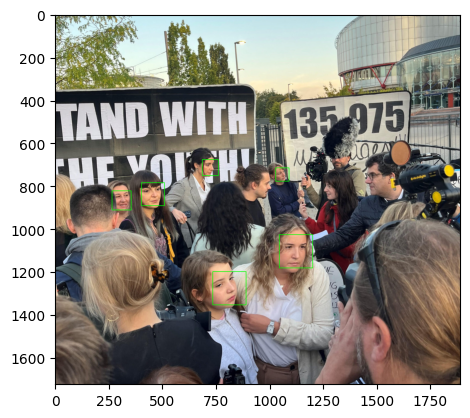

In [26]:
face_detector_fr('data/3.jpg')

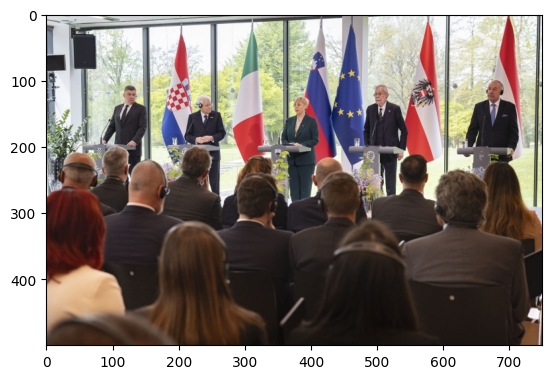

In [27]:
face_detector_fr('data/4.jpeg')

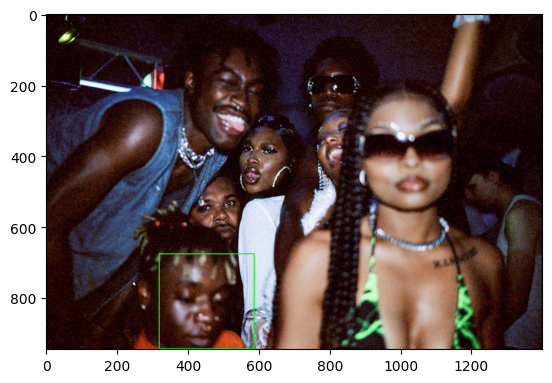

In [28]:
face_detector_fr('data/8.jpg')

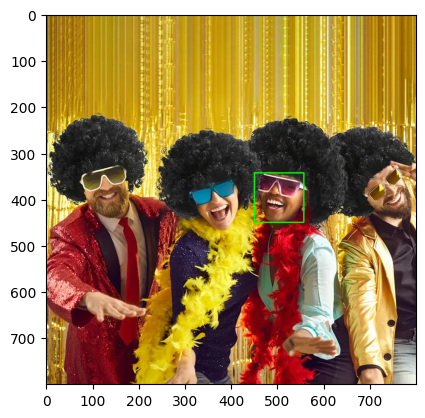

In [29]:
face_detector_fr('data/8.webp')

face_recognition model works a bit better and can detect more faces. Still fails in small faces under angle and black faces

I0000 00:00:1718810095.788862 11183350 gl_context.cc:357] GL version: 2.1 (2.1 ATI-4.8.101), renderer: AMD Radeon Pro 5500M OpenGL Engine
W0000 00:00:1718810095.790188 11206575 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


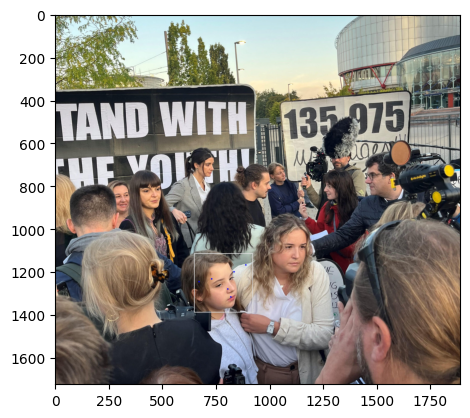

In [38]:
import mediapipe as mp

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

def face_detector_media(url):

    # Load the input image
    img = cv2.imread(url)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform face detection
    with mp_face_detection.FaceDetection(min_detection_confidence=0.2) as face_detection:
        results = face_detection.process(img_rgb)

    # Draw the face detection annotations on the image
    if results.detections:
        for detection in results.detections:
            mp_drawing.draw_detection(img, detection)

    # Display the output image with face detections
    plt.imshow(img)

face_detector_media('data/3.jpg')

I tried this model but it doesn't work good for me.

I tried more advanced models and for me, best results on images was on https://github.com/serengil/retinaface it detects all faces where models from this notebook was failed. I used it from HF https://huggingface.co/spaces/hysts/ibug-face_detection

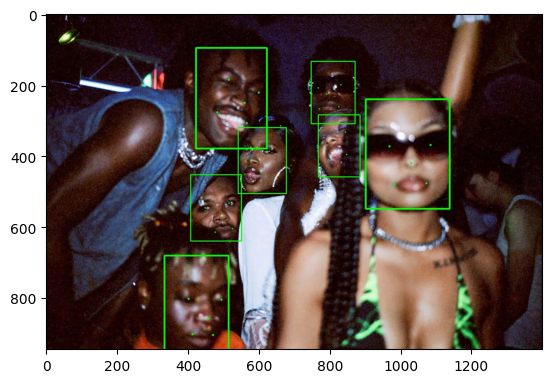

In [43]:
img = cv2.imread('data/image.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)